# About Dataset
This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

1.name 

2.year

3.selling_price

4.km_driven

5.fuel

6.seller_type

7.transmission

8.Owner


For used motorcycle datasets please go to https://www.kaggle.com/nehalbirla/motorcycle-dataset

# 001 Import Dependencies





In [ ]:
# Import pandas package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# 002 Data Collection and Processing

In [ ]:
# Loading data to pandas DataFrame
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading csv File
file_path = '/content/drive/MyDrive/Colab Notebooks/ML_Practice_Projects/Project 7: Laaso Regression Car Price Prediction/car data.csv'
car_data=pd.read_csv(file_path)
pd.set_option('display.max_columns',None)

In [ ]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
# checking no of rows
car_data.shape

(301, 9)

In [ ]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
# getting some information about this dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# Getting Statistical data
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
# Checking the no of missing values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc92df4ea90>,
      dtype=object)

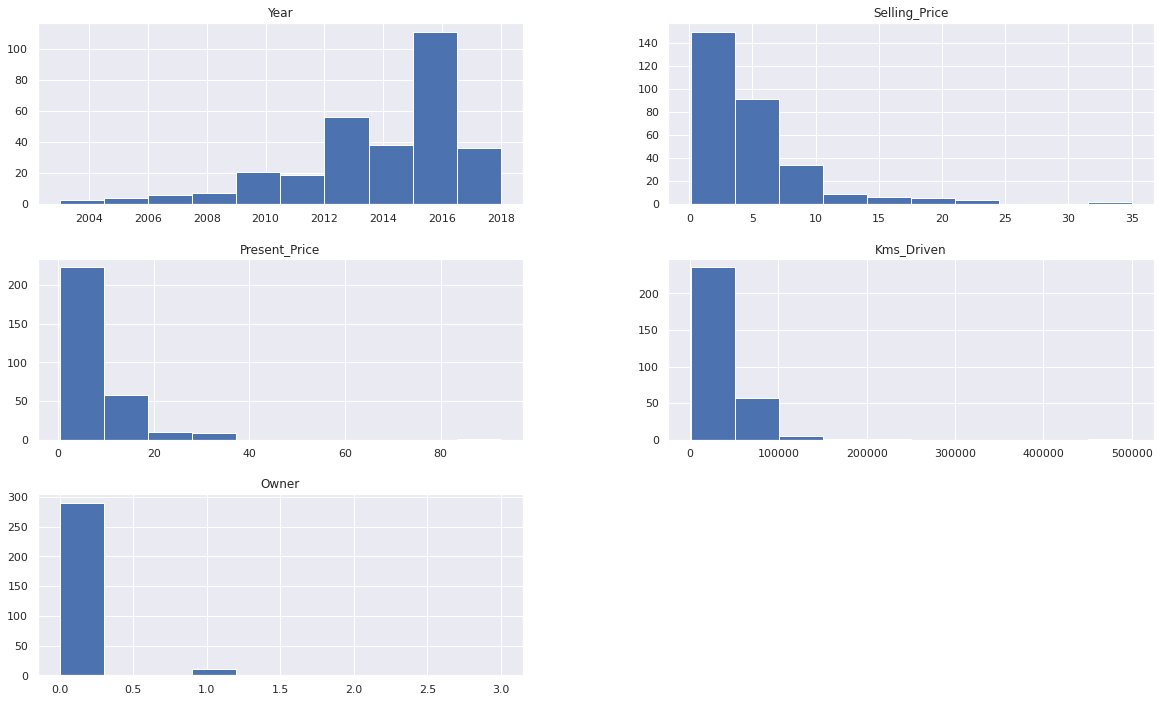

In [ ]:
car_data.hist(figsize=(20,12))

In [ ]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
# .Checking the distribution of categorical data
print(car_data['Fuel_Type'].value_counts())

print(car_data['Seller_Type'].value_counts())

print(car_data['Transmission'].value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


### Encoding the categorical data

In [ ]:
# Encoding Fuel_Type column
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}}, inplace=True)

# Encoding Seller_Type column
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace=True)

# Encoding Transmission column
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}}, inplace=True)

In [ ]:
car_data.head(7)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0


# 003 Splitting the data into Training and Test Data

In [ ]:
X = car_data.drop(['Car_Name','Selling_Price'], axis=1)
Y = car_data['Selling_Price']

X.head()


,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [ ]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [ ]:

# splitting train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=2 )

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(301, 7) (270, 7) (31, 7)


In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(301,) (270,) (31,)


# 004 Model Training 
Loading Linear Regression Model


In [ ]:
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

# 005 Model Evaluation

In [ ]:
# Prediction on Training data
Training_data_prediction = lin_reg_model.predict(X_train)
Training_data_prediction

array([ 3.73088505e+00,  5.60702081e+00,  7.79779356e+00, -1.88374756e+00,
        6.71614572e+00,  8.14343296e+00,  5.84067525e+00,  6.17919527e+00,
        6.15863751e+00,  1.59459051e+01,  2.15385926e+00,  1.11618544e+00,
       -4.05463414e-01,  6.69051516e+00,  6.81961414e+00,  1.02957394e+00,
        6.74306974e+00,  1.43864300e+01,  3.00001893e+00,  7.95149024e+00,
       -8.38569413e-01,  9.02067892e+00,  1.21210550e+00,  2.20040027e+00,
       -8.23744275e-01,  7.52651502e-01,  1.00142469e+01, -4.08950275e-01,
       -2.40418357e+00,  9.99845989e+00,  6.81867179e+00,  1.09249928e+00,
        4.36158792e+00,  9.20660480e-02,  3.48993776e+00,  2.78147834e+00,
        1.50401026e+00,  4.65736158e-01,  1.68679810e+00,  1.18722506e+00,
        4.32936153e+00,  6.09932798e+00,  9.51639926e-01,  7.52875828e-01,
        6.05967594e+00,  3.49453005e+00,  2.40969246e+00,  7.52230513e+00,
        4.63113915e+00,  4.44239322e+00,  4.22460259e+00,  2.71077171e+00,
        4.46881874e+00,  

In [ ]:
# R square Error
error_score = metrics.r2_score(Y_train,Training_data_prediction)

In [ ]:
print("R Squared erroe is ",error_score)

R Squared erroe is  0.8799451660493711


Visualize the actual prices and predicted prices

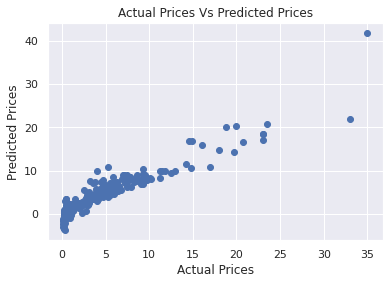

In [ ]:
plt.scatter(Y_train,Training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices Vs Predicted Prices')
plt.show()

In [ ]:
# Prediction on Test data
Test_data_prediction = lin_reg_model.predict(X_test)
Test_data_prediction

array([10.32892855,  0.77165673,  4.26482324,  4.78985002,  9.88701568,
        4.24823193,  6.92536953,  7.29321065,  0.21950514,  5.18527582,
        6.23823964,  6.07761019,  2.1716932 ,  7.77611973,  1.89987958,
        1.79635895,  2.10001123,  1.91953211,  9.24977006,  4.25291486,
        1.569912  ,  9.04949049,  1.52561157,  9.65418587,  0.89631315,
        7.99187626,  1.59929505, -3.17680912,  4.24653988,  2.1257015 ,
        3.49654935])

In [ ]:
# R square Error
error_score_test = metrics.r2_score(Y_test,Test_data_prediction)

In [ ]:
print("R Squared erroe is ",error_score_test)

R Squared erroe is  0.8365766715027051


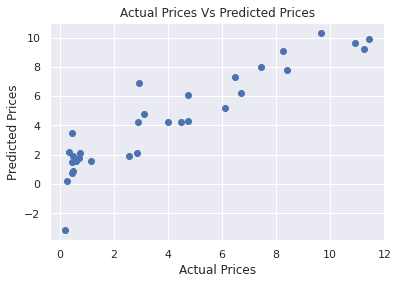

In [ ]:
plt.scatter(Y_test,Test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices Vs Predicted Prices')
plt.show()

## Lasso Regression

In [ ]:
lass_reg_model = Lasso()

In [ ]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

# 005 Model Evaluation

In [ ]:
# Prediction on Training data
Training_data_prediction = lass_reg_model.predict(X_train)
Training_data_prediction

array([ 3.56679076e+00,  5.60257564e+00,  8.28781371e+00, -8.30814314e-01,
        5.27539880e+00,  6.50367937e+00,  5.73552938e+00,  6.41187200e+00,
        4.78218845e+00,  1.54979701e+01,  2.60868685e+00,  1.68164537e+00,
        4.65587149e-01,  5.14260426e+00,  6.87569869e+00,  1.60372469e+00,
        5.30299396e+00,  1.39150016e+01,  2.86877663e+00,  6.44421824e+00,
        9.38523430e-02,  9.99955865e+00,  1.79683394e+00,  2.66121014e+00,
        2.10269105e-02,  1.39327221e+00,  1.01152846e+01,  4.55985698e-01,
       -1.29850564e+00,  8.96458834e+00,  6.87473286e+00,  2.80689227e+00,
        4.00679563e+00,  8.93707044e-01,  3.11243615e+00,  2.61344453e+00,
        2.13519495e+00,  1.21115483e+00,  2.20395877e+00,  1.77253883e+00,
        4.40123646e+00,  4.26379158e+00,  1.53108120e+00,  2.67410546e+00,
        4.37186991e+00,  2.41613935e+00,  2.90706331e+00,  6.07491388e+00,
        5.02364608e+00,  4.39669701e+00,  3.59203190e+00,  2.67643327e+00,
        4.41172590e+00,  

In [ ]:
# R square Error
error_score = metrics.r2_score(Y_train,Training_data_prediction)

In [ ]:
print("R Squared erroe is ",error_score)

R Squared erroe is  0.8427856123435794


Visualize the actual prices and predicted prices

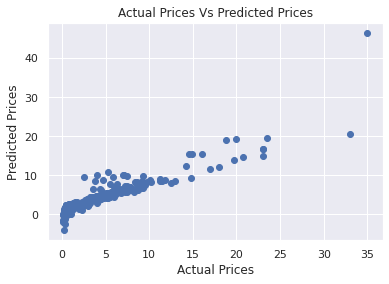

In [ ]:
plt.scatter(Y_train,Training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices Vs Predicted Prices')
plt.show()

In [ ]:
# Prediction on Test data
Test_data_prediction = lass_reg_model.predict(X_test)
Test_data_prediction

array([ 9.87888122,  1.42396266,  4.33267834,  3.17313445,  8.95590579,
        4.29397384,  3.73913632,  5.66283974,  0.91478394,  5.25514316,
        6.47238818,  4.39507335,  1.2955156 ,  8.26559961,  2.00292338,
        2.32529219,  2.55349653,  2.34742172,  7.96895166,  4.18441245,
        2.3369918 ,  7.86598537,  2.02308236,  8.56734786,  1.55498136,
        6.48561097,  2.11427451, -1.18422036,  4.01710445,  2.21749695,
        2.41820898])

In [ ]:
# R square Error
error_score_test = metrics.r2_score(Y_test,Test_data_prediction)

In [ ]:
print("R Squared erroe is ",error_score_test)

R Squared erroe is  0.8709167941173195


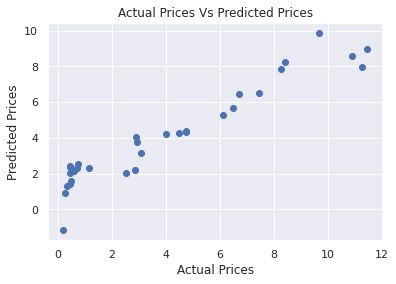

In [ ]:
plt.scatter(Y_test,Test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices Vs Predicted Prices')
plt.show()

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_reg_model = Ridge()

In [ ]:
ridge_reg_model.fit(X_train,Y_train)

Ridge()

# 005 Model Evaluation

In [ ]:
# Prediction on Training data
Training_data_prediction = ridge_reg_model.predict(X_train)
Training_data_prediction

array([ 3.73533464e+00,  5.61925870e+00,  7.82179708e+00, -1.88345616e+00,
        6.68181924e+00,  8.11177836e+00,  5.85364234e+00,  6.19607155e+00,
        6.12546219e+00,  1.59279197e+01,  2.16936353e+00,  1.12770098e+00,
       -4.00299715e-01,  6.66339411e+00,  6.83811634e+00,  1.04563057e+00,
        6.70807077e+00,  1.43711195e+01,  3.00400526e+00,  7.92480161e+00,
       -8.36682765e-01,  9.05477164e+00,  1.22492397e+00,  2.21579886e+00,
       -8.11607249e-01,  7.61794235e-01,  9.98828912e+00, -4.05020468e-01,
       -2.40640141e+00,  9.98329784e+00,  6.83719753e+00,  1.15412433e+00,
        4.36486786e+00,  9.67841007e-02,  3.43806534e+00,  2.78405411e+00,
        1.51812414e+00,  4.76668890e-01,  1.70026972e+00,  1.20092917e+00,
        4.33739625e+00,  6.05707927e+00,  9.71228312e-01,  7.73466245e-01,
        6.02109927e+00,  3.44534295e+00,  2.42673262e+00,  7.47214378e+00,
        4.64043412e+00,  4.45113171e+00,  4.20394902e+00,  2.71488900e+00,
        4.47425522e+00,  

In [ ]:
# R square Error
error_score = metrics.r2_score(Y_train,Training_data_prediction)

In [ ]:
print("R Squared erroe is ",error_score)

R Squared erroe is  0.8799138947708273


Visualize the actual prices and predicted prices

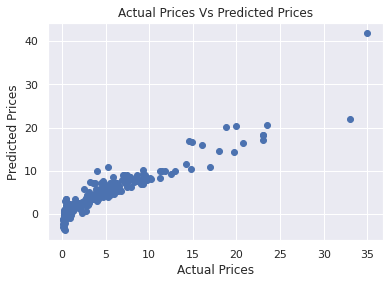

In [ ]:
plt.scatter(Y_train,Training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices Vs Predicted Prices')
plt.show()

In [ ]:
# Prediction on Test data
Test_data_prediction = ridge_reg_model.predict(X_test)
Test_data_prediction

array([10.31201169,  0.7827818 ,  4.27394155,  4.74568563,  9.84810632,
        4.25300912,  6.83402359,  7.25958263,  0.22694487,  5.19672696,
        6.25364115,  6.03964236,  2.11735744,  7.8006646 ,  1.8989672 ,
        1.80907551,  2.11686047,  1.93626579,  9.23318961,  4.26242304,
        1.58189111,  9.03042254,  1.53967463,  9.61814613,  0.90503797,
        7.9641789 ,  1.61495225, -3.13363206,  4.25088369,  2.11544995,
        3.44731182])

In [ ]:
# R square Error
error_score_test = metrics.r2_score(Y_test,Test_data_prediction)

In [ ]:
print("R Squared erroe is ",error_score_test)

R Squared erroe is  0.8400976059753145


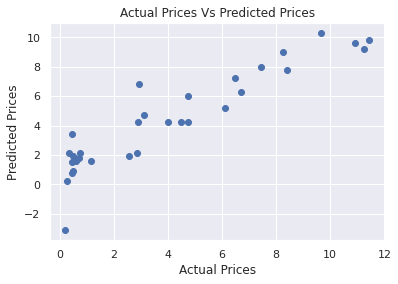

In [ ]:
plt.scatter(Y_test,Test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices Vs Predicted Prices')
plt.show()